In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [6]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 136298)

### Examine Inertia

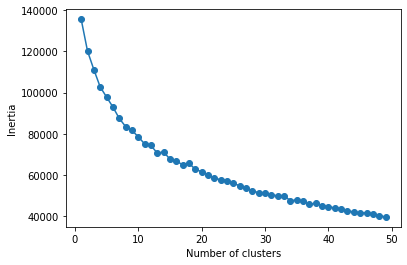

In [69]:
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 50):
    km = KMeans(n_clusters=i, n_jobs=-1)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Set number of clusters

In [82]:
cluster_count = 30

### Create Silhouette Plots

In [78]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [10, 20, 30, 50, 70]
# range_n_clusters = [6, 7]

For n_clusters = 10 The average silhouette_score is : 0.030105239822519603


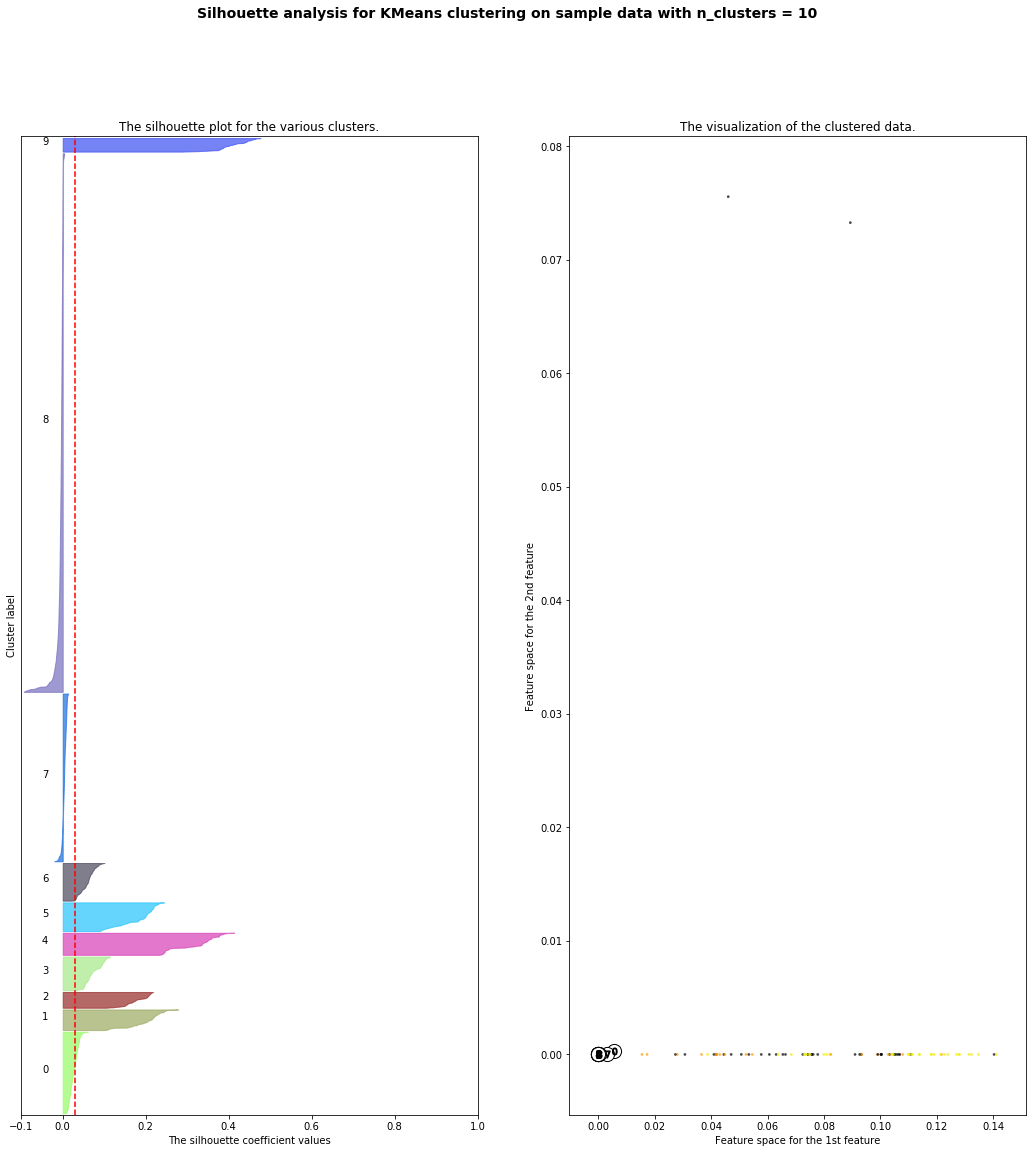

For n_clusters = 20 The average silhouette_score is : 0.04251926177086201


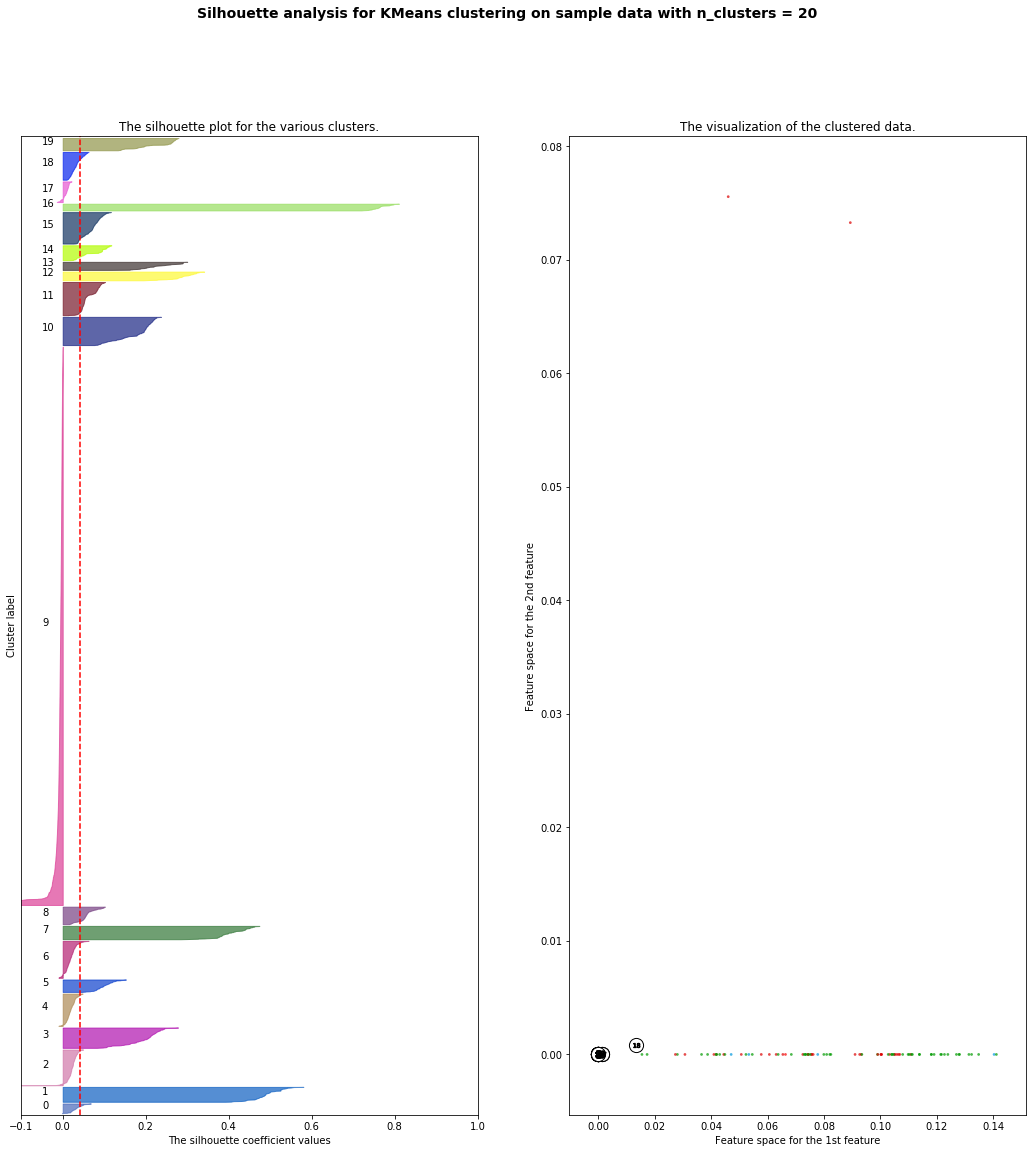

For n_clusters = 30 The average silhouette_score is : 0.055066402128923476


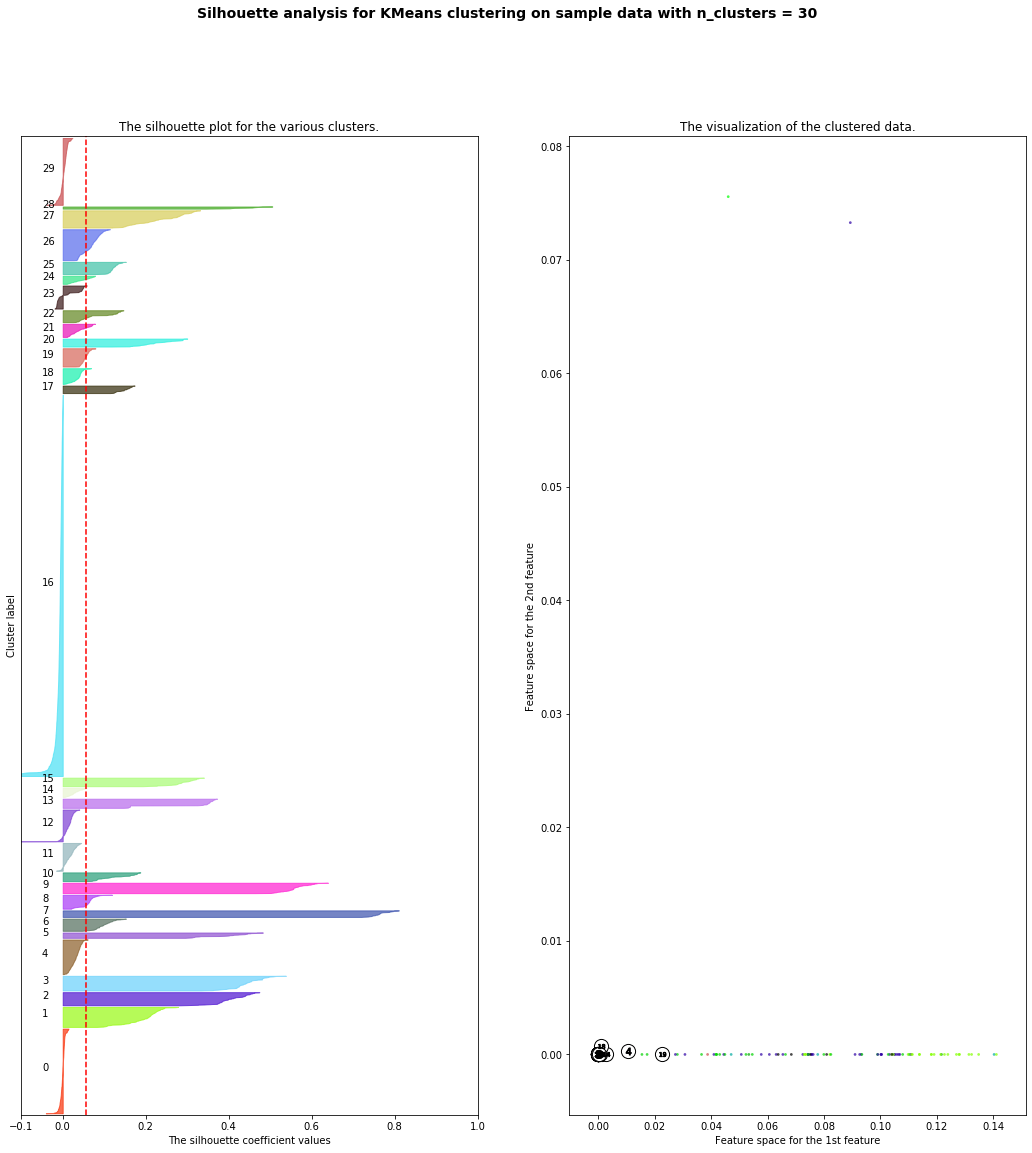

For n_clusters = 50 The average silhouette_score is : 0.06439439750484113


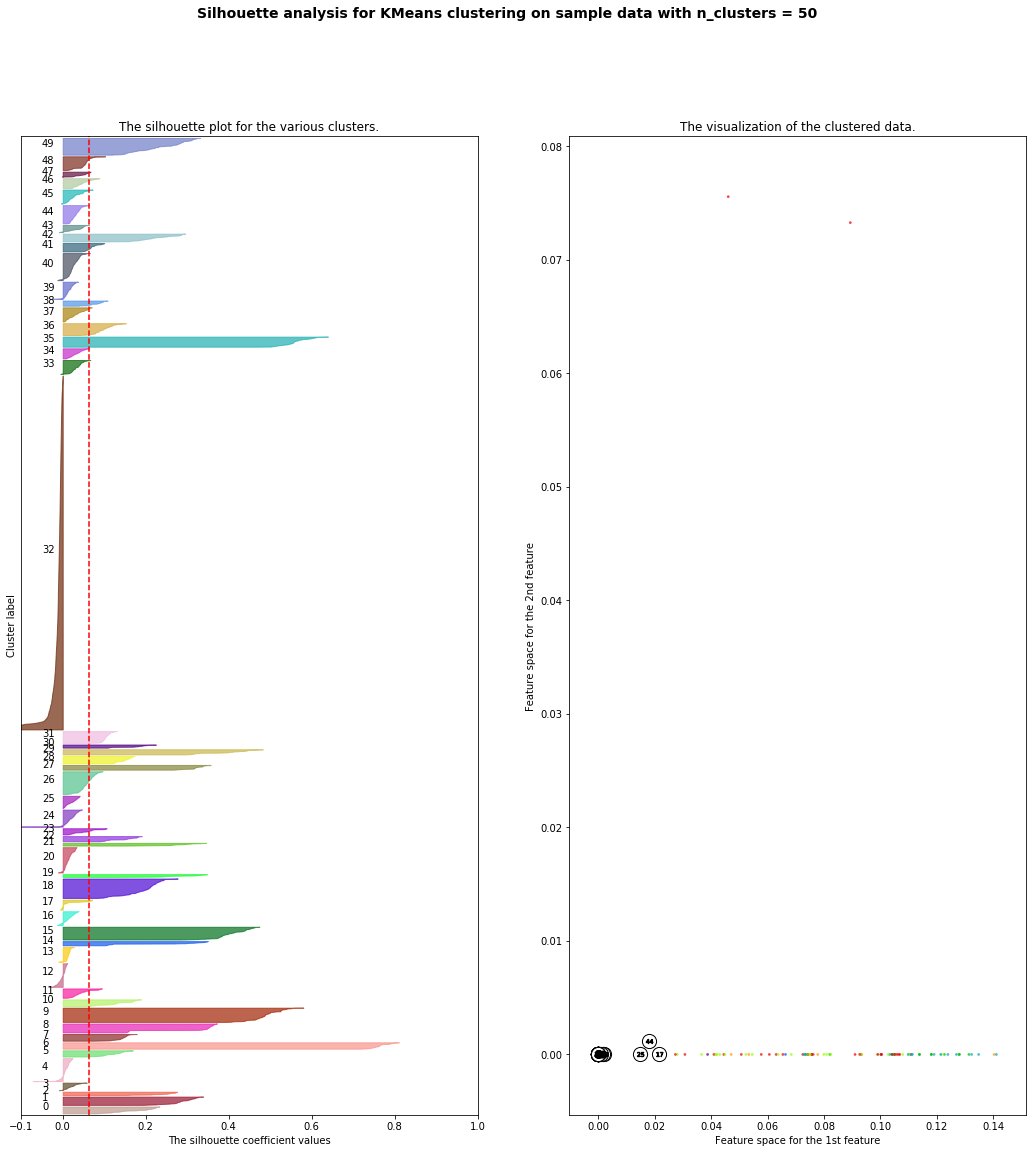

For n_clusters = 70 The average silhouette_score is : 0.06663754624930826


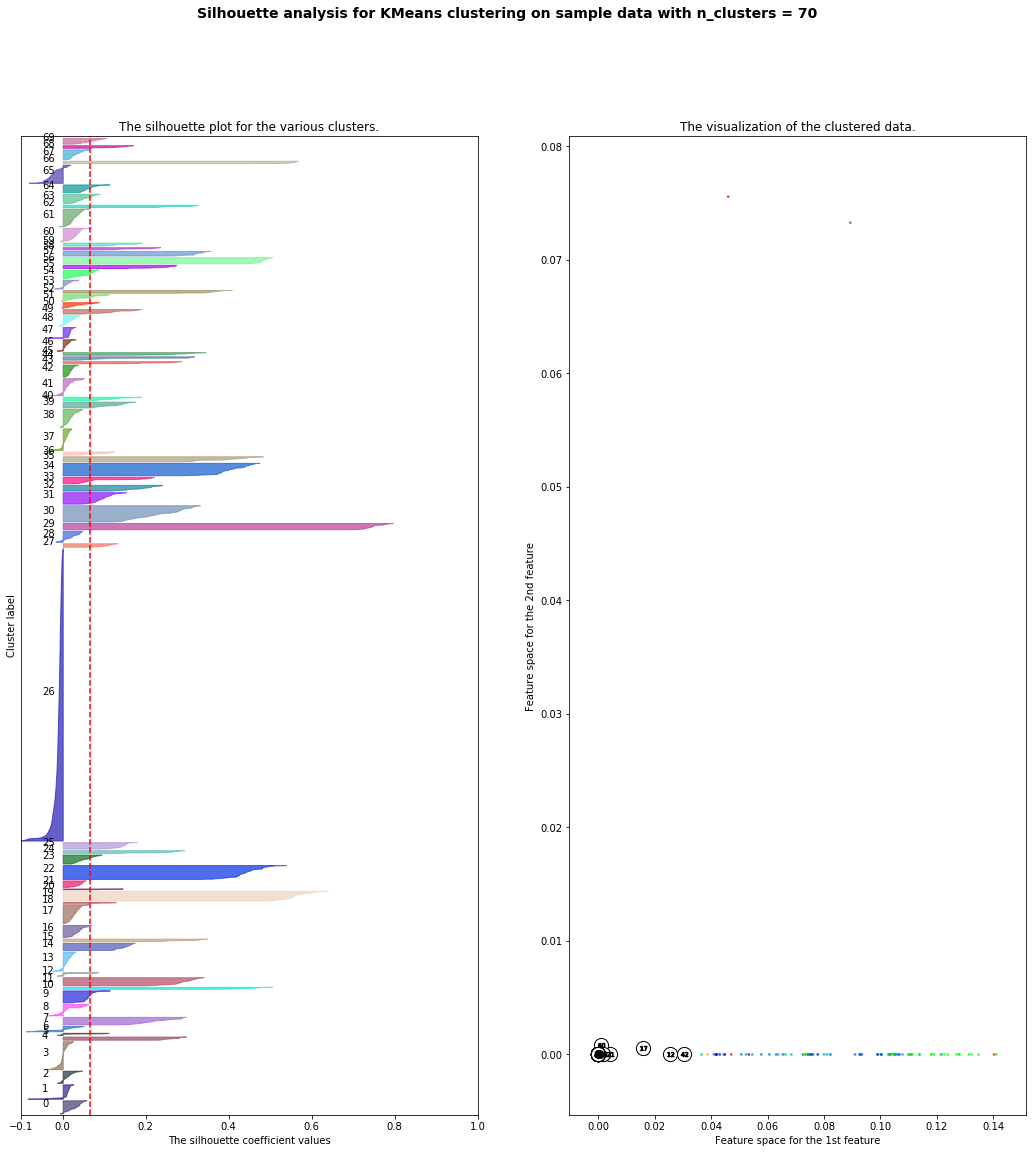

In [79]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
#     fig, (ax1) = plt.subplots(1, 1)
#     fig.set_size_inches(9, 17)
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 18)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    
        # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.toarray()[:, 0], X.toarray()[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    
    

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### fit Kmeans

In [83]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=cluster_count, n_jobs=-1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### labels are named with integers and stored in the `labels_` attribute

In [84]:
km.labels_
print(km.labels_)

[29 26 26 ... 26 26 26]


### take a look at one of the cluster results

In [85]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for cluster in range(0,cluster_count):
    item_count = 0
    descriptions = []
    for i in range(0,len(km.labels_)):
        if km.labels_[i] == cluster:
            item_count += 1
#             print('item number:', i)
            descriptions.append(raw_data['product_description'][i])
    print('*****************************************************************')
    print('CLUSTER:', cluster)
    print('COUNT:', item_count)
    if item_count >= 5:
        print('DESCRIPTIONS: \n')
        print(*descriptions, sep = "\n---\n")

*****************************************************************
CLUSTER: 0
COUNT: 133
DESCRIPTIONS: 

Fresh Frozen Grade A Speckled Butter Beans, Net Wt. 32 oz. (2 lb.) 907 g. Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20000-1; Fresh Frozen Grade A Specked Butter Beans, Net Wt. 80 Oz. (5 lb.) 2268g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549,UPC 0-86069-50000-2; Fresh Frozen Speckled Butter Beans, Net Wt. 16 oz. (1 lb.) 454 g, UPC 0-86069-20001-8
---
Fresh Frozen Grade A Jalisco Style Blend, Net Wt. 32 Oz. (2 Lb.) 907g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20405-4
---
Fresh Frozen Grade A Country Blend, Net Wt. 32 Oz. (2 Lb.) 907g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20170-1
---
Fresh Frozen IQF Collards, Net Wt. 2 lb., Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-25040-2
---
Fresh Frozen Grade A Whole Okra, Net Wt. 32 Oz. (2 lb.) 907g. Dist. By Fresh Frozen Food

*****************************************************************
CLUSTER: 3
COUNT: 73
DESCRIPTIONS: 

Smoked Coho Salmon Bellies is sold in vacuum packed plastic packages, net weight from 0.5 to 1 lb.,  with label located on the front that include the pack date and AK 604.    The label is read in parts: "***BIG BLUE FISHERIES, LLC***Smoked Coho Salmon Bellies***Ingredients: Wild Alaskan Salmon, Water, Sugar, Salt, & Soy Sauce***AK 604***Order online @ alaskasmokedfish.com***".
---
Hickory Smoked Coho Salmon is sold in vacuum packed plastic packages, net weight from 0.5 to 1 lb.,  with label located on the front that include the pack date and AK 604.    The label is read in parts: "***BIG BLUE FISHERIES, LLC***Hickory Smoked Coho Salmon***Ingredients: Wild Alaskan Salmon, Water, Sugar, Salt, & Soy Sauce***AK 604***Order online @ alaskasmokedfish.com***".
---
Pepper Smoked Coho Salmon is sold in vacuum packed plastic packages, net weight from 0.5 to 1 lb.,  with label located on the fro

*****************************************************************
CLUSTER: 5
COUNT: 92
DESCRIPTIONS: 

Sweet and Sour Stir Fry packaged under the following brand names and sizes:  Garden Highway Chef Essentials 10.5 oz;  Raley's 10.5 oz Safeway Farms 10.5 oz .    Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
---
Traditional Gourmet Portabella Mushrooms  Garden Highway Chef Essentials brand, 8 oz package .    Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
---
Southwest Crimini Mushrooms,  8.0 oz, packaged under Delish  brand name:  and 7 oz package under Chef Essentials Brand name.  Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
---
Southwest  Style Portabella Mushrooms: 8.0 oz  .  Packaged under the brand names of Garden Highway Chef Essentials, Raley's and Sprouts.  Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
---
Pacific Coast brand Pizza Stuffed Mushrooms, 8 oz package.   Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
---
Garden Highway brand Tr

Weis Old Fashion Cole Slaw, UPC 0 41497 05849 5, 16 oz, Product Code 05849.  Weis Old Fashion Coleslaw, UPC 0 11596 53100 7, 2/5 lb., Product Code 3100.
---
Market Pantry Mustard Potato Salad , UPC 0 85329 24104 2, 16 oz, Product Code 24104. Garden-Fresh Mustard Potato Salad, UPC 0 11596 14010 0, 16 oz, Product Code 4010. Spartan Mustard Potato Salad, UPC 0 11213 90319 4, 16 oz, Product Code 4071. Garden-Fresh Mustard Potato Salad, UPC 0 11596 24215 6, 2 lb., Product Code 4215. Garden-Fresh Mustard Potato Salad , UPC 0 11596 34313 6, 3 lb., Product Code 4313. Garden-Fresh Mustard Potato Salad, UPC 0 11596 51013 2, 2/5 lb., Product Code 1013. Market Pantry Mustard Potato Salad, UPC 0 85239 24100 4, 3 lb., Product Code 24100. Dairy Fresh Mustard Potato Salad , UPC 0 70163 89090 9, 2/5 lb., Product Code 
---
Garden-Fresh Greek Style Pasta Salad, UPC 0 11596 52035 3, 1/5 lb., Product Code 2035. 9/30/2013 - 10/8/2013 
---
Market Pantry American Style Potato Salad, UPC 0 85239 24107 3, 16 oz

Mrs. Giles Homestyle Potato Salad, Formula POG16, packaged in 2/5-lb carton cases. Reser's Fine Foods, Inc., Beaverton, OR.
---
Zesty Rotini with Mushrooms Formula PA.99, packaged under these labels:  Resers Pasta Salad in 2/8 lb containers. Resers Fine Foods, Inc. Beaverton, OR.
---
Essential Everyday Homestyle Potato Salad, Formula PO.137, packaged in 6/16-oz (UPC 041303820148) and 6/3-lb (UPC 041303820179) carton cases.  Distributed by Supervalu Inc., Eden Prairie, MN.
---
Red Potato Salad, Formula PO.37, packaged under these labels:    -Reser's Red Potato Salad, packaged in 6/16-oz (UPC 071117190052), 6/3-lb (UPC 071117004816) carton cases.    -Stonemill Kitchens, Country Red Potato Salad, packaged in 6/4-lb (UPC 071117616842) carton cases. Reser's Fine Foods, Beaverton, OR.
---
Reser's Fine Foods, Cheesy Macaroni Salad, Formula MA.66 packaged in 12/454-gm carton cases (UPC 071117182415) and 6/1.25-KG carton cases (UPC 071117612271) plastic containers. Reser's Fine Foods, Inc., B

*****************************************************************
CLUSTER: 16
COUNT: 249
DESCRIPTIONS: 

Pierre Jamwich Crustless Peanut Butter & Jelly Sandwich, 2.8oz., AdvancePierre Foods, Inc., 9990 Princeton Glendale Road, Cincinnati, OH 45246.
---
Albertsons Brand Peanut Butter Cup Ice Cream, 1.5 Quarts (1.42L), commonly called a 48 fl oz container.     	Peanut Butter Cup Ice Cream,  (Vanilla ice cream with peanut butter cup pieces, fudge and peanut butter swirls); 1.5 QTS (1.42L), (UPC Code 0 41163 45891 8 for Albertsons Peanut Butter Cup)    Packaged in paper cardboard round oblong container. Labeled with a.	Buena Park (IMS Plant Number  06-20). Labeled as "Distributed by SUPERVALU INC. Eden Prairie, MN 55344".    	06-20 1024 RA (plant code, 24 hour time, operator initial)    	MFG 10/08/12 EXP 10/08/13 LOTE A (manufacturing month, day, year , expiration month, day, year, lot number)    	Code date is injected on the bottom of container in black ink  	UPC Code:    0 41163 45891 8 

Fresh n Easy brand Garden with Romaine, 4 x 5 lb bag, UPC: n/a; Product is a salad item; bagged in clear polyethylene film (foodservice) and polypropylene/polyethylene (retail). Refrigerate and consume within Best By date. Product is processed and packaged by River Ranch Fresh Foods, LLC
---
Cross Valley brand Shredded Icebreg (1/4"), (1/8")  4 x 5 lb bag, UPC: n/a; Product is a salad item; bagged in clear polyethylene film (foodservice) and polypropylene/polyethylene (retail). Refrigerate and consume within Best By date. Product is processed and packaged by River Ranch Fresh Foods, LLC
---
Hy Vee brand Chopped Romaine, 10 oz bag, UPC:  75450-12055; Product is a salad item; bagged in clear polyethylene film (foodservice) and polypropylene/polyethylene (retail). Refrigerate and consume within Best By date. Product is processed and packaged by River Ranch Fresh Foods, LLC, Salinas, CA
---
The Farmers Market brand American Salad Blend, 12 oz bag, UPC:  30034-30105; Product is a salad item

*****************************************************************
CLUSTER: 20
COUNT: 102
DESCRIPTIONS: 

Egg Salad Spreads: 1) Garden-Fresh Egg Salad Spread, 5 lbs.,  0 11596 52053 7; 2) Finest Traditions Egg Salad Spread, 12 oz., 7 33147 10491 0 &  4 lbs., 10 733147 10189             
---
German Potato Salads packaged under the following brand, dip name, container size, and UPC number:    1.  Copperwood Kitchens German Potato Salad, 5 lbs., 8 11839 01033 3;     2.  Garden-Fresh German Potato Salad, 16 oz., 0 11596 14017 9 ,3 lbs., 0 11596 34319 8 , 5 lbs., 0 11596 91020 8  3. Grandpa's German Potato Salad, 5 lbs., 0 11596 91023 9           
---
Finest Traditions Smoked Imitation Salmon, 12 oz., 7 33147 00127 1; 8 lbs., 10 733147 10120 6    
---
Finest Traditions Deluxe Potato Salad, 16 oz., 7 33147 00007 6, 3 lb., 7 33147 00030 4, 8 lb., 10 733147 10130 5, 8 lb., 10 733147 10450 4      
---
American Potato Salads: 1) Garden-Fresh American Potato Salad, 1 lb., 0 11596 14015 5, 2 lb., 0

*****************************************************************
CLUSTER: 23
COUNT: 130
DESCRIPTIONS: 

Spicy Chicken Marinade - Bake, item number 724444.01 Distributed by Kerry Ingredients & Flavours 3330 Millington Road, Beloit, WI 53511 Ingredients: salt, yeast extract, modified corn starch, dried chicken broth, onion powder, garlic powder, natural flavor, dried red pepper sauce (aged red peppers, vinegar, salt, garlic) maltodextrin, soybean oil, citric acid, paprika extract (color),  and less than 2% of calcium stearate to prevent caking.
---
ALFALFA SEED, NET WT. 50 LB. International Specialty Supply LLC, Cookeville, TN
---
Turkey Dripping Type Marinade X1, 50 lb. bags, Manufactured by Newly Weds Foods, Chicago, IL 60639, product G00988 
---
Italian Marinade, item number 725450.01 Distributed by Kerry Ingredients & Flavours 3330 Millington Road, Beloit, WI 53511 Ingredients: salt, dried garlic, sugar, corn syrup solids, maltodextrin, yeast extract, spices, dried onion, dried chic

*****************************************************************
CLUSTER: 25
COUNT: 121
DESCRIPTIONS: 

Chicken Salad on White Bread, Net Wt. 4.00 oz., UPC 7-01248-00104-9, MFG Code 105; Deluxe Chicken Salad on Toast, Net Wt. 5.00 oz., UPC 7-01248-01019-5, MFG Code 1716; Chicken Salad on White, Net Wt. 4.30 oz., UPC 7-01248-01101-7, MFG Code 1817    
---
Ham & Turkey Hoagie, Net Wt. 5.30 oz., UPC 7-01248-00148-3, MFG Code 166  
---
Turkey and Swiss on Croissant, Net Wt. 5.50 oz., UPC 7-01248-01092-8, MFG Code 1808
---
Pimento Cheese on White, Net Wt. 4.30 oz., UPC 7001248-01099-7, MFG Code 1815  
---
Jumbo Breakfast (Sausage, Ham, Egg & Cheese on Bun), Net Wt. 5.25 oz., UPC 7-01248-00507. MFG Code 607  
---
Turkey Breast & Bacon on Wheat (Wedge), Net Wt. 4.80 oz. UPC 7-01248-01072-0, MFG Code 1787
---
BBQ Pork on Bun, Net. Wt. 5.35 oz., UPC 7-01248-00880-2, MFG Code 1587
---
Ham & Cheese on Wheat, Net Wt. 3.00 oz., UPC 7-01248-00827-7, MFG Code 1035; Ham & Cheese on Wheat, Net Wt. 3.8

*****************************************************************
CLUSTER: 26
COUNT: 2896
DESCRIPTIONS: 

Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/28/12 Distributed by: Walgreen Co. 200 Wilmot Road, Deerfield, IL 60015 Distributed by Walgreens UPC 049022 55862 5
---
Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) Best By: 8/28/12 and before   F& S Produce Co. Inc. Headquarters, Rosenhayn, NJ 08532      UPC 6 01172 00264 1
---
Fresh Fruit Product is labeled in part:  "***Fresh Island Medley***1 LB (454g)***Best If Sold By***Ingredients:  Pineapple, Mango, Papaya.***Packed in its own juice***Distributed by:  Winn-Dixie Stores Inc. Jacksonville, FL 32254***For Nutrition Information Call 1-888-449-9386***P-009***0 21140 01696 6***PERISHABLE KEEP REFRIGERATED***"
---
Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774522620, Use by dates 9/9/2012 or earlier and 9/7/2012 & 9/8/2012.
---
Onion Slab Cut.  Products are labeled in part:  "***Onions Yellow Slab***Ready To Eat Product***LB***"      

Penny's Roasted Red Pepper Hummus 12 oz has UPC 7 49404 51848 2;  Harbor Greens Roasted Red Pepper Hummus 8 oz has  UPC  7 49404 80414 1;  Tacoma Boys Roasted Red Pepper Hummus 8 oz has UPC 7 49404 90414 8;  Roasted Red Pepper Hummus (no brand name) 1 gallon has No UPC.
---
Artichoke Wheatberry Salad:  sold in prepackaged pint and half pint containers in the Prepared Foods Dept. as well as sold fresh from the Deli case and salad bar.
---
Southwest SooFoo Salad:  sold in prepackaged pint and half pint containers in the Prepared Foods Dept. as well as sold fresh from the Deli case and salad bar.
---
Flora Double Ginger Herbal Tea Blend, 16/1.24 oz (35.2g) tea bags per package.  UPC 0 61998 63757 9    The product is labeled in parts: "***DOUBLE GINGER HERBAL TEA BLEND***FLORA***CERTIFIED ORGANIC***FRESH-SEALED TEA BAGS***16***NET WT 1.24 oz***(35.2 g)***INGREDIENTS: GINGER ROOT, LEMONGRASS HERB, PEPPERMINT LEAVES, LICORICE ROOT, BLACK PEPPER SEEDS, *ORGANIC***IMPORTED BY: FLORA INC., 805 

Dr. Praeger's Black Bean Slider, 10 lbs (4.54 kg), Best if used by: May-12-2018, UPC (01) 0 0080868 06615, Dr. Praeger's Sensible Foods, Elmwood Park, NJ 07407
---
Quaker Quinoa Granola Bars, yogurt, fruit and nut flavor  packaged in a multi colored box with brown lettering. 5, 1.23 oz bars per box. 
---
Dr. Praeger's California Veggie Burgers, 12 x 11 oz. (312g)/box, Best if used by: May-16-2018, UPC 0 0080868 000010 7, Dr. Praeger's Sensible Foods, Elmwood Park, NJ 07407
---
Aldi Kale Burger, Net 18.75 lbs, 30 x 10 oz (284 grams), Sell By: May -17-2018
---
Dr. Praeger's Chipotle Black Bean Burger, 4.25 oz., 10 lbs  (4.54 kg), Best if used by: May-12-2018, UPC (01) 0 0080868 06621 9, Dr. Praeger's Sensible Foods, Elmwood Park, NJ 07407
---
Pepper Strips, Brand Signature Kitchens, Net Wt 14 oz, UPC 2113009100  
---
Labeled "CSFISHERY COMMUNITY SUPPORTED FISHERY Wild Albacore Tuna, 64 oz.., Ingredients:  Oregon Albacore Tuna, Sea Salt"    Label is black ink on an off white label.    No 

Organic Cashew Meal; Net Wt: 25 LBS
---
Natures Promise Organic Campfire Trail Mix 12oz.
---
DR Mac 7 70MACA04    
---
chic-a-peas baked crunchy chickpeas fresh salsa net wt. 2.0 oz (57g); UPC: 8 53404 00407 1
---
Coconut Med Shred Toasted-Nat
---
Coconut Butter-ORGANIC 70COCO03  
---
Pecan Fancy SM  Pieces Roasted 70PECA05
---
Roasted & Sea Salted Macadamia Nut Size 4 (Net weight 25 lb. vacuum packed cartons) (Wholesale)
---
Kit Winter Citrus Slaw, 2/7.15 lbs., Food Service item # 71909, UPC 20728 71909.    Ingredients: Veggie Power Blend, Bacon Pieces, Red onion, Mandarin Organe, Oil/Syrup.      
---
(1) Walgreens  NICE Egg Salad on White Bread, 6.1 oz	  (2) Turkey Hill Fresh Selects Egg salad on Homestyle Bread,4.7 oz	  (3)Target Egg salad on White Bread, 5.9 oz.	  (4) American Food and Vending Enza Choice Egg Salad on White Bread,4.7 oz    Packaged in plastic wedge container.	
---
SALAD CHICKEN MEXICAN POWER SB;  Identifier #46000006104, 1 lb. container
---
GnuPharma Foundation 10

*****************************************************************
CLUSTER: 27
COUNT: 73
DESCRIPTIONS: 

Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-service bar. It was not sold labeled.    MISO KISSED CUKES	
---
Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-service bar. It was not sold labeled.    Tuna with Sun-Dried Cranberries
---
Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-service bar. It was not sold labeled.    PASTA WITH LONG BEANS & ARAME IN CREAMY BEET VINAIGRETTE  
---
Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-ser